In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = (r"C:\Users\91999\brain tumour detection\dataset\Training")
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

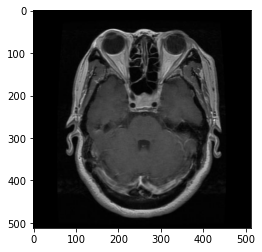

In [3]:
plt.imshow(img_array);

In [4]:
img_array.shape

(512, 512, 3)

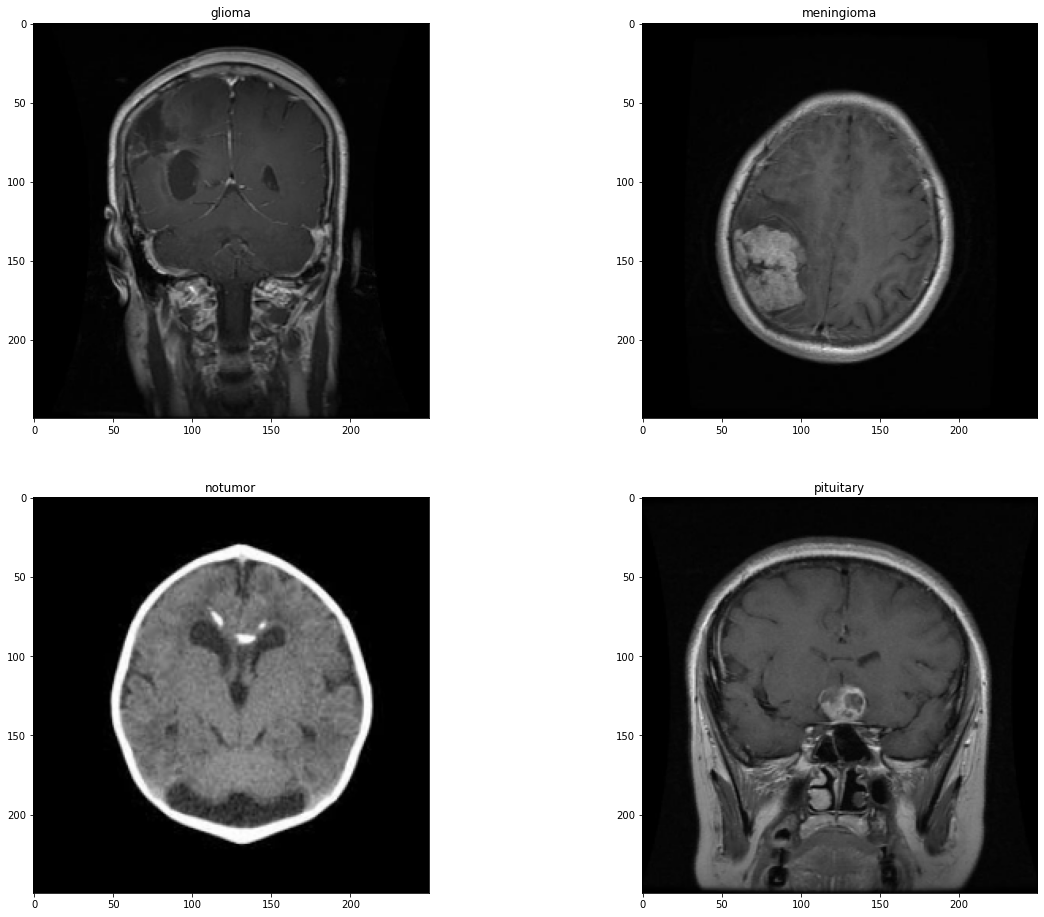

In [5]:
plt.figure(figsize=(20, 16))

images_path = [r"C:\Users\91999\brain tumour detection\dataset\Training\glioma\Tr-gl_0010.jpg",r"C:\Users\91999\brain tumour detection\dataset\Training\meningioma\Tr-me_0010.jpg",r"C:\Users\91999\brain tumour detection\dataset\Training\notumor\Tr-no_0010.jpg",r"C:\Users\91999\brain tumour detection\dataset\Training\pituitary\Tr-pi_0010.jpg"]

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

In [6]:
model5 = Sequential()

# Convolutional layer 1
model5.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model5.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())

# Full connect layers

model5.add(Dense(units= 1024, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=512, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=4, activation='softmax'))



model5.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [7]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory(r"C:\Users\91999\brain tumour detection\dataset\Training", target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory(r"C:\Users\91999\brain tumour detection\dataset\Testing", target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

history5 = model5.fit(train, steps_per_epoch=5712//32, epochs=10, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model5_es, model5_rlr, model5_mcp])

Epoch 1/10
178/178 [==============================] - ETA: 0s - loss: 0.7233 - categorical_accuracy: 0.7326
Epoch 1: val_categorical_accuracy improved from -inf to 0.27109, saving model to model5_weights.h5
178/178 [==============================] - 1192s 7s/step - loss: 0.7233 - categorical_accuracy: 0.7326 - val_loss: 1.4334 - val_categorical_accuracy: 0.2711 - lr: 0.0010
Epoch 2/10
178/178 [==============================] - ETA: 0s - loss: 0.4187 - categorical_accuracy: 0.8357
Epoch 2: val_categorical_accuracy improved from 0.27109 to 0.37187, saving model to model5_weights.h5
178/178 [==============================] - 1061s 6s/step - loss: 0.4187 - categorical_accuracy: 0.8357 - val_loss: 1.6946 - val_categorical_accuracy: 0.3719 - lr: 0.0010
Epoch 3/10
178/178 [==============================] - ETA: 0s - loss: 0.3218 - categorical_accuracy: 0.8773
Epoch 3: val_categorical_accuracy improved from 0.37187 to 0.78438, saving model to model5_weights.h5
178/178 [========================

In [9]:
import pickle

In [12]:
with open("Braintumour.pkl", "wb") as f:
    pickle.dump(history5, f)  

In [13]:
with open("Braintumour.pkl", "rb") as f:
    history5 = pickle.load(f)

In [14]:
def predict_input_image(img):
    img_4d=img.reshape(-1,180,180,3)
    prediction=model.predict(img_4d)[0]
    return {test[i]: float(prediction[i]) for i in range(5)}

In [26]:
from keras.models import load_model
model5.save("final.h5")


In [30]:
loaded_model = load_model("final.h5")
loss, accuracy = loaded_model.evaluate(test)

41/41 [==============================] - 66s 2s/step - loss: 0.0938 - categorical_accuracy: 0.9680


In [2]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import keras.utils as image


In [3]:
model = load_model("final.h5")

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load a single image
image_path = "C:/Users/91999/brain tumour detection/dataset/Testing/glioma/Te-gl_0010.jpg"
image = load_img(image_path, target_size=(200, 200), color_mode='grayscale')

# Preprocess the image
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)

# Normalize and preprocess the image
image_array = image_array / 255.0  # Normalize pixel values between 0 and 1
image_array = (image_array - 0.5) * 2  # Scale pixel values to the range of -1 to 1

# You can now use the image_array as input to your model for inference

In [29]:
predictions=model.predict(image_array)

1/1 [==============================] - 0s 94ms/step


In [30]:
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print("Predicted class:", predicted_class)

Predicted class: [2]


In [31]:
model.save_weights('weights.h5')

In [33]:
import tensorflow as tf
import cv2
import numpy as np

# Load the trained model architecture
model = tf.keras.models.Sequential()
# ... Define the model architecture (same as in the provided code snippet)

# Load the trained model weights
model.load_weights('weights.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to the required input dimensions
    image = cv2.resize(image, (200, 200))
    
    # Normalize the image
    image = image / 255.0
    
    # Reshape the image to match the input shape expected by the model
    image = np.reshape(image, (1, 200, 200, 1))
    
    return image

# Function to make predictions
def predict_image(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(image)
    
    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    
    # Print the prediction result
    print("Predicted Class Index: ", predicted_class_index)

# Path to the input image for prediction
input_image_path = r"C:\Users\91999\Dropbox\My PC (LAPTOP-PLKVRNNC)\Desktop\Tr-me_0010.jpg"

# Make predictions for the input image
predict_image(input_image_path)

ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.

In [39]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model5 = load_model('final.h5')

# Function to preprocess the custom input image
def preprocess_custom_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (200, 200))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    return image
# Path to the custom input image for prediction
custom_input_image_path = r"C:\Users\91999\brain tumour detection\dataset\Training\pituitary\Tr-pi_0010.jpg"

# Preprocess the custom input image
custom_image = preprocess_custom_image(custom_input_image_path)

# Make predictions on the custom input image
predictions = model5.predict(np.array([custom_image]))
predicted_class_index = np.argmax(predictions[0])
tumor_types = ['Type 1', 'Type 2', 'Type 3', 'Type 4']
predicted_tumor_type = tumor_types[predicted_class_index]

# Print the prediction result
print("Predicted Tumor Type:", predicted_tumor_type)

1/1 [==============================] - 0s 456ms/step
Predicted Tumor Type: Type 4
